From this notebook, I start to learn the middle level API as follows:

    3-1. tf.data.Dataset
    3-2. tf.feature column
    3-3. tf.keras.activation
    3-4. tf.keras.layers
    3-5. tf.keras.losses
    3-6. tf.keras.metrics
    3-7. tf.keras.optimizers
    3-8. tf.keras.callbacks

tf.keras.Dataset is discussed in this notebook. 

tf.data API is used to construct the data pipeline. The data pipeline could get information from numpy.array, pandas.DataFrame, Python generator, csv file, text file, file paths, tfrecords, etc. numpy.array and pandas.DataFrame is the most frequently used. tfrecords is more complicated, but more efficient.

In [29]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt 
import os

## Construct data pipeline

### 1. From numpy.array

In [2]:
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
ds_1 = tf.data.Dataset.from_tensor_slices((iris["data"], iris["target"]))

In [6]:
for features, label in ds_1.take(5):
    print(features, label)

tf.Tensor([5.1 3.5 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.9 3.  1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.7 3.2 1.3 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.6 3.1 1.5 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([5.  3.6 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)


### 2. From pandas.DataFrame

In [9]:
df_iris = pd.DataFrame(iris["data"], columns=iris.feature_names)

In [12]:
ds_2 = tf.data.Dataset.from_tensor_slices((df_iris.to_dict("list"),iris["target"]))

for features,label in ds_2.take(1):
    print(features,label)

{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=5.1>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.5>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)


### 3. From python generator

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
image_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
                    "./data/cifar2/test/",
                    target_size=(32, 32),
                    batch_size=20,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [15]:
classdict = image_generator.class_indices
print(classdict)

{'airplane': 0, 'automobile': 1}


In [17]:
def generator():
    for features,label in image_generator:
        yield (features,label)

ds_3 = tf.data.Dataset.from_generator(generator,output_types=(tf.float32,tf.int32))

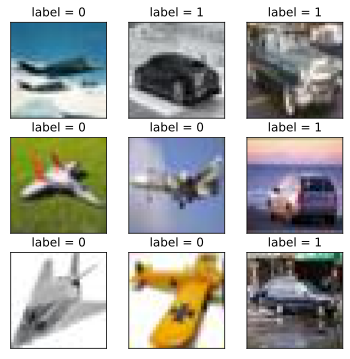

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,6)) 
for i,(img,label) in enumerate(ds3.unbatch().take(9)):
    ax=plt.subplot(3,3,i+1)
    ax.imshow(img.numpy())
    ax.set_title("label = %d"%label)
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()

### 4. From csv file

In [21]:
ds_4 = tf.data.experimental.make_csv_dataset(file_pattern=["./data/titanic/train.csv","./data/titanic/test.csv"],
                                            batch_size=3,
                                            label_name="Survived",
                                            na_value="",
                                            num_epochs=1,
                                            ignore_errors=True)

In [22]:
for data, label in ds_4.take(5):
    print(data, label)

OrderedDict([('PassengerId', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([857, 518, 148], dtype=int32)>), ('Pclass', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 3, 3], dtype=int32)>), ('Name', <tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'Wick, Mrs. George Dennick (Mary Hitchcock)',
       b'Ryan, Mr. Patrick', b'Ford, Miss. Robina Maggie "Ruby"'],
      dtype=object)>), ('Sex', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'female', b'male', b'female'], dtype=object)>), ('Age', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([45.,  0.,  9.], dtype=float32)>), ('SibSp', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 0, 2], dtype=int32)>), ('Parch', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 0, 2], dtype=int32)>), ('Ticket', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'36928', b'371110', b'W./C. 6608'], dtype=object)>), ('Fare', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([164.8667,  24.15  ,  34.375 ], dtype=float32)>), ('Ca

### 5. From text file

In [23]:
ds5 = tf.data.TextLineDataset(
    filenames = ["./data/titanic/train.csv","./data/titanic/test.csv"]
    ).skip(1) #skip the header

for line in ds5.take(5):
    print(line)

tf.Tensor(b'493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S', shape=(), dtype=string)
tf.Tensor(b'53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C', shape=(), dtype=string)
tf.Tensor(b'388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,,S', shape=(), dtype=string)


### 6. From file paths

In [24]:
ds_6 = tf.data.Dataset.list_files("./data/cifar2/train/*/*.jpg")

In [25]:
for file in ds_6.take(10):
    print(file)

tf.Tensor(b'./data/cifar2/train/automobile/4612.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/automobile/824.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/automobile/3170.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/automobile/4224.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/airplane/2279.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/automobile/1439.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/airplane/1140.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/airplane/2228.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/airplane/4463.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/airplane/2755.jpg', shape=(), dtype=string)


In [26]:
def load_image(img_path,size = (32,32)):
    label = 1 if tf.strings.regex_full_match(img_path,".*/automobile/.*") else 0
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img) #注意此处为jpeg格式
    img = tf.image.resize(img,size)
    return(img,label)

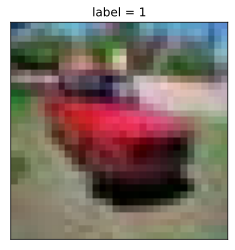

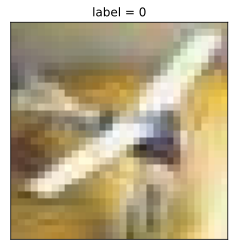

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
for i,(img,label) in enumerate(ds_6.map(load_image).take(2)):
    plt.figure(i)
    plt.imshow((img/255.0).numpy())
    plt.title("label = %d"%label)
    plt.xticks([])
    plt.yticks([])

### 7. From tfrecords

In [42]:
def create_tfrecords(inpath, outpath):
    writer = tf.io.TFRecordWriter(outpath)
    dirs = os.listdir(inpath)
    for idx, name in enumerate(dirs):
        class_path = os.path.join(inpath, name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = tf.io.read_file(img_path)
            example = tf.train.Example(
               features=tf.train.Features(feature={
                    'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[idx])),
                    'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img.numpy()]))
               }))
            writer.write(example.SerializeToString())
    writer.close()

In [43]:
create_tfrecords("./data/cifar2/test/","./data/cifar2_test.tfrecords/")

In [44]:
def parse_example(proto):
    description ={ 'img_raw' : tf.io.FixedLenFeature([], tf.string),
                   'label': tf.io.FixedLenFeature([], tf.int64)} 
    example = tf.io.parse_single_example(proto, description)
    img = tf.image.decode_jpeg(example["img_raw"]) 
    img = tf.image.resize(img, (32,32))
    label = example["label"]
    return(img,label)

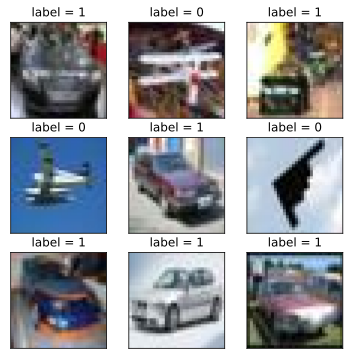

In [45]:
ds7 = tf.data.TFRecordDataset("./data/cifar2_test.tfrecords").map(parse_example).shuffle(3000)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,6)) 
for i,(img,label) in enumerate(ds7.take(9)):
    ax=plt.subplot(3,3,i+1)
    ax.imshow((img/255.0).numpy())
    ax.set_title("label = %d"%label)
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()

## Dataset in detail

Dataset related functions:
    1. map
    2. flat_map
    3. interleave
    4. filter
    5. zip
    6. concatenate
    7. reduce
    8. batch
    9. padded_batch
    10. window
    11. shuffle
    12. repeat
    13. shard
    14. take
You can also check official tutorial about Dataset: https://www.tensorflow.org/api_docs/python/tf/data/Dataset
 
Let's check them one by one.

#### 1. map

In [46]:
ds = tf.data.Dataset.from_tensor_slices(["hello world","hello cat","hello dog"])

In [47]:
ds_map = ds.map(lambda x: tf.strings.split(x, " "))

In [48]:
for x in ds_map:
    print(x)

tf.Tensor([b'hello' b'world'], shape=(2,), dtype=string)
tf.Tensor([b'hello' b'cat'], shape=(2,), dtype=string)
tf.Tensor([b'hello' b'dog'], shape=(2,), dtype=string)


#### 2. flat_map

In [56]:
ds_flatmap = ds.map(lambda x:tf.data.Dataset.from_tensor_slices(tf.strings.split(x," ")))
for x in ds_flatmap:
    print("current x is: ", x)
    for y in x:
        print("Element in x is:", y)

current x is:  <_VariantDataset shapes: (), types: tf.string>
Element in x is: tf.Tensor(b'hello', shape=(), dtype=string)
Element in x is: tf.Tensor(b'world', shape=(), dtype=string)
current x is:  <_VariantDataset shapes: (), types: tf.string>
Element in x is: tf.Tensor(b'hello', shape=(), dtype=string)
Element in x is: tf.Tensor(b'cat', shape=(), dtype=string)
current x is:  <_VariantDataset shapes: (), types: tf.string>
Element in x is: tf.Tensor(b'hello', shape=(), dtype=string)
Element in x is: tf.Tensor(b'dog', shape=(), dtype=string)


In [63]:
ds_flatmap = ds.flat_map(lambda x:tf.data.Dataset.from_tensor_slices(tf.strings.split(x," ")))
for x in ds_flatmap:
    print(x)

tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'world', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'dog', shape=(), dtype=string)


#### 3. interleave

In [58]:
ds_interleave = ds.interleave(lambda x:tf.data.Dataset.from_tensor_slices(tf.strings.split(x," ")))
for x in ds_interleave:
    print(x)

tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'world', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'dog', shape=(), dtype=string)


In [82]:
ds_tmp = tf.data.Dataset.range(1, 6)  # ==> [ 1, 2, 3, 4, 5 ] 
# NOTE: New lines indicate "block" boundaries. 
ds_interleave = ds_tmp.interleave( 
    lambda x: tf.data.Dataset.from_tensors(x).repeat(10), 
    cycle_length=3, block_length=2) 

In [83]:
for x in ds_interleave:
    print(x)

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype

#### 4. filter

In [84]:
ds_filter = ds.filter(lambda x: tf.strings.regex_full_match(x, ".*[a|B].*"))
for x in ds_filter:
    print(x)

tf.Tensor(b'hello cat', shape=(), dtype=string)


#### 5. zip

In [85]:
ds1 = tf.data.Dataset.range(0,3)
ds2 = tf.data.Dataset.range(3,6)
ds3 = tf.data.Dataset.range(6,9)
ds_zip = tf.data.Dataset.zip((ds1,ds2,ds3))
for x,y,z in ds_zip:
    print(x.numpy(),y.numpy(),z.numpy())

0 3 6
1 4 7
2 5 8


#### 6. concatenate

In [87]:
ds1 = tf.data.Dataset.range(0,3)
ds2 = tf.data.Dataset.range(3,6)
ds_concat = tf.data.Dataset.concatenate(ds1,ds2)
for x in ds_concat:
    print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)


#### 7. reduce

In [88]:
ds = tf.data.Dataset.from_tensor_slices([1,2,3,4,5.0])
ds.reduce(0.0, lambda x,y:tf.add(x,y))

<tf.Tensor: shape=(), dtype=float32, numpy=15.0>

In [99]:
tf.data.Dataset.range(4, 5).reduce(np.int64(10), lambda x, y: x + y).numpy() 

14

#### 8. batch

In [100]:
ds = tf.data.Dataset.range(12)
ds_batch = ds.batch(4)
for x in ds_batch:
    print(x)

tf.Tensor([0 1 2 3], shape=(4,), dtype=int64)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int64)
tf.Tensor([ 8  9 10 11], shape=(4,), dtype=int64)


#### 9. padded_batch

In [103]:
elements = [[1, 2],[3, 4, 5],[6, 7],[8]]
ds = tf.data.Dataset.from_generator(lambda: iter(elements), tf.int32)
for x in ds:
    print(x)

tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor([3 4 5], shape=(3,), dtype=int32)
tf.Tensor([6 7], shape=(2,), dtype=int32)
tf.Tensor([8], shape=(1,), dtype=int32)


In [106]:
ds_padded_batch = ds.padded_batch(1,padded_shapes = [4,])
for x in ds_padded_batch:
    print(x)

tf.Tensor([[1 2 0 0]], shape=(1, 4), dtype=int32)
tf.Tensor([[3 4 5 0]], shape=(1, 4), dtype=int32)
tf.Tensor([[6 7 0 0]], shape=(1, 4), dtype=int32)
tf.Tensor([[8 0 0 0]], shape=(1, 4), dtype=int32)


#### 10. window

In [108]:
ds = tf.data.Dataset.range(12)
for x in ds:
    print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)


The return of .window is dataset of dataset

In [109]:
ds_window = ds.window(3, shift=1)
for x in ds_window:
    print(x)
    for y in x:
        print(y)

<_VariantDataset shapes: (), types: tf.int64>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
<_VariantDataset shapes: (), types: tf.int64>
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
<_VariantDataset shapes: (), types: tf.int64>
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
<_VariantDataset shapes: (), types: tf.int64>
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
<_VariantDataset shapes: (), types: tf.int64>
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
<_VariantDataset shapes: (), types: tf.int64>
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
<_VariantDataset shapes: (), types: tf.int64>
tf.Tensor(6, shape=(), dtype=i

flat the dataset

In [110]:
ds_window_flat = ds_window.flat_map(lambda x: x.batch(3,drop_remainder=True)) 
for x in ds_window_flat:
    print(x)

tf.Tensor([0 1 2], shape=(3,), dtype=int64)
tf.Tensor([1 2 3], shape=(3,), dtype=int64)
tf.Tensor([2 3 4], shape=(3,), dtype=int64)
tf.Tensor([3 4 5], shape=(3,), dtype=int64)
tf.Tensor([4 5 6], shape=(3,), dtype=int64)
tf.Tensor([5 6 7], shape=(3,), dtype=int64)
tf.Tensor([6 7 8], shape=(3,), dtype=int64)
tf.Tensor([7 8 9], shape=(3,), dtype=int64)
tf.Tensor([ 8  9 10], shape=(3,), dtype=int64)
tf.Tensor([ 9 10 11], shape=(3,), dtype=int64)


#### 11. shuffle

In [111]:
ds = tf.data.Dataset.range(12)
ds_shuffle = ds.shuffle(buffer_size = 5)
for x in ds_shuffle:
    print(x)

tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


#### 12. repeat

In [112]:
ds = tf.data.Dataset.range(3)
ds_repeat = ds.repeat(3)
for x in ds_repeat:
    print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)


#### 13. shard

In [117]:
ds = tf.data.Dataset.range(12)
ds_shard = ds.shard(3,index=0)

for x in ds_shard:
    print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


#### 14. take

In [118]:
ds = tf.data.Dataset.range(12)
ds_take = ds.take(3)

list(ds_take.as_numpy_iterator())

[0, 1, 2]